In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas 


crimes = pd.read_csv("Pittsburgh Police Blotter (30 day).csv")
crime_data = crimes.groupby("Neighborhood").sum()['Number of Incidents']
crime_data.sort_values(ascending=False)
crime_data.head()

Neighborhood
Allegheny Center     26
Allentown            45
Arlington            30
Arlington Heights     8
Banksville           17
Name: Number of Incidents, dtype: int64

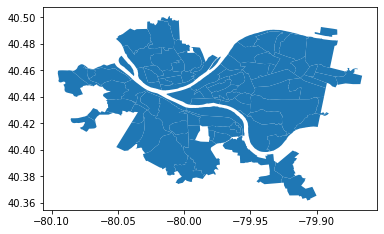

In [3]:
#Adding Shape File to better visualize data
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
neighborhoods.plot()

In [15]:
hoods = pd.read_csv("Neighborhoods.csv")
hoods = hoods[['hood','area','perimeter','intptlat10','intptlon10']]
hoods.head()

,hood,area,perimeter,intptlat10,intptlon10
0,Chateau,10688264.0,80995.806272,+40.4518148,-080.0280506
1,Summer Hill,12232021.0,80995.806272,+40.4922173,-080.0081121
2,Northview Heights,8739570.0,80995.806272,+40.4776383,-080.0025945
3,Spring Hill-City View,17550592.0,80995.806272,+40.4632158,-079.9941680
4,Perry South,25220622.0,80995.806272,+40.4733966,-080.0097343


In [11]:
crime_map = neighborhoods.merge(crime_data, how='left', left_on='hood', right_on='Neighborhood')
crime_map[['hood','Number of Incidents','intptlat10','intptlon10']].head()


,hood,Number of Incidents,intptlat10,intptlon10
0,Chateau,33.0,+40.4518148,-080.0280506
1,Summer Hill,2.0,+40.4922173,-080.0081121
2,Northview Heights,18.0,+40.4776383,-080.0025945
3,Spring Hill-City View,16.0,+40.4632158,-079.9941680
4,Perry South,50.0,+40.4733966,-080.0097343


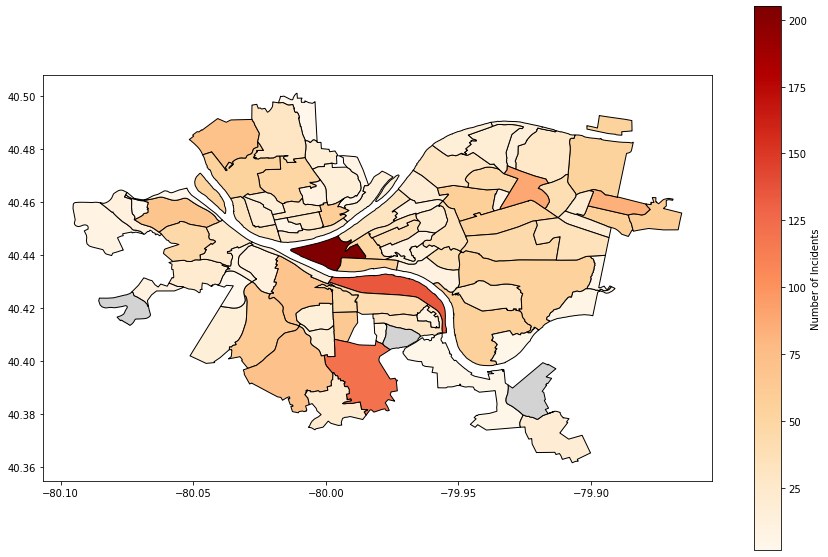

In [9]:
import geopandas
import pandas as pd
crimes = pd.read_csv("Pittsburgh Police Blotter (30 day).csv")
crime_data = crimes.groupby("Neighborhood").sum()['Number of Incidents']
crime_data.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
crime_map = neighborhoods.merge(crime_data, how='left', left_on='hood', right_on='Neighborhood')
crime_map.plot(column='Number of Incidents', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
# No data recorded for: St. Clair, East Carnegie, 